# __Titanic dataset exploratory analysis__

##### With this project, I want to learn data analysis approaches using Python and special libraries such as:
* Pandas
* Seaborn
* Matplotlib.pyplot


##### There won't be any specific questions I want to ask this data before getting started. I will explore as many questions as I can during the process. Some of the research may be redundant and not practically useful for a real-case data analysis. However, primarily, this project focuses on working with data visualization tools. Throughout the process, I will enhance my ability to understand and work with data in Python.


### Part #3: Finding outliers

#### __Let's start by importing libraries__

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### __Now, when we know from the [Part #2](https://github.com/cult2rologist/Titanic-Dataset/blob/main/Titanic_Part2.ipynb) that there's some outliers we want to investigate__
* As usual, we start from reading our dataset using Pandas, dropping NA values and assigning string values to the 'Survived' column
* Cheking result using .head() function

In [410]:
titanic = pd.read_csv('Titanic.csv')
titanic = titanic.dropna(subset=['Age','Embarked'])
#Changing 'Survived' column's Boolean logic with string values
titanic.loc[:, 'Survived'] = titanic['Survived'].map({0:'No', 1:'Yes'})

In [411]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,Yes,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


#### __Looking for outliers within 'Age' column__
* First we would use .describe() function in order to see the full picture of what we have

In [412]:
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### __Next, we will use Interquartile Range (IQR) to clean our dataset from outliers__
* Let's try it on 'Age' column

In [413]:
def remove_outliers_iqr(data, column_name):
    q1 = titanic['Age'].quantile(0.25)
    q3 = titanic['Age'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    titanic_age_cleaned = titanic[(titanic['Age'] >= lower_bound) & (titanic['Age'] <= upper_bound)]
    return titanic_age_cleaned
titanic_age_cleaned = remove_outliers_iqr(titanic, 'Age')

print("Before removing outliers:")
print(titanic['Age'].describe())

print("\nAfter removing outliers:")
print(titanic_age_cleaned['Age'].describe())

Before removing outliers:
count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

After removing outliers:
count    704.000000
mean      29.165724
std       13.858102
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       65.000000
Name: Age, dtype: float64


* Now, let's juxtapose and compare two boxplots side by side

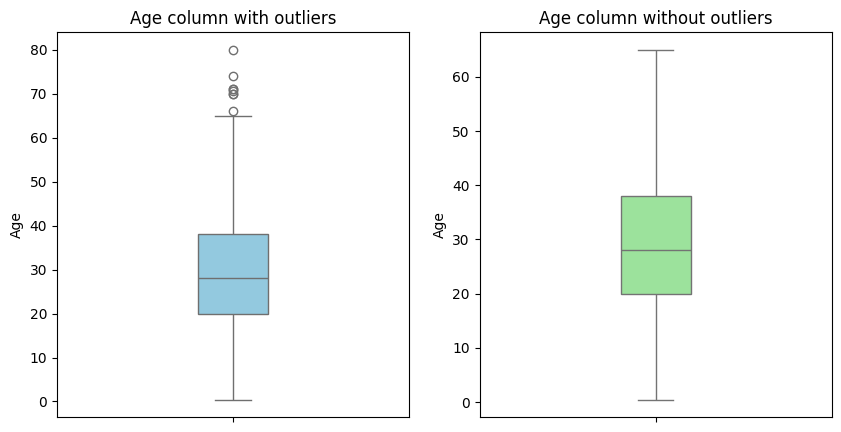

In [414]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'Age', width = .2, color = 'skyblue')
axes[0].set_title('Age column with outliers')

sns.boxplot(ax = axes[1], data = titanic_age_cleaned, y = 'Age', width = .2, color = 'lightgreen')
axes[1].set_title('Age column without outliers')

plt.show()

#### __We've removed outliers from the 'Age' column, but there are still more columns to clean up__
* Let's now focus on the 'Fare' column
* We'll handle the 'Fare' with Standard Deviation approach, which is used to identify and possibly remove or cap extreme values

In [415]:
def remove_outliers_std(data, column_name):
    mean = titanic['Fare'].mean()
    std = titanic['Fare'].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    titanic_fare_cleaned = titanic[(titanic['Fare'] >= lower_bound) & (titanic['Fare'] <= upper_bound)]
    return titanic_fare_cleaned

titanic_fare_cleaned = remove_outliers_std(titanic, 'Fare')

print("Before removing outliers:")
print(titanic['Fare'].describe())

print("\nAfter removing outliers:")
print(titanic_fare_cleaned['Fare'].describe())

Before removing outliers:
count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

After removing outliers:
count    694.000000
mean      28.061983
std       30.353275
min        0.000000
25%        8.050000
50%       14.500000
75%       31.206250
max      164.866700
Name: Fare, dtype: float64


* __In this particular case, we need to set up an additional threshold to cap outliers because the gap between the maximum values is too large, and we still need to handle it. However, we don't want to lose valuable data, so we can try adjusting different threshold values and find the one we will be satisfied with the result__

In [416]:
mean = titanic_fare_cleaned['Fare'].mean()
std = titanic_fare_cleaned['Fare'].std()
threshold = mean + 3 * std # We can adjust the multiplier as needed

titanic_fare_cleaned.loc[titanic_fare_cleaned['Fare'] > threshold, 'Fare'] = threshold

* Now, it's time to visualize what we've got

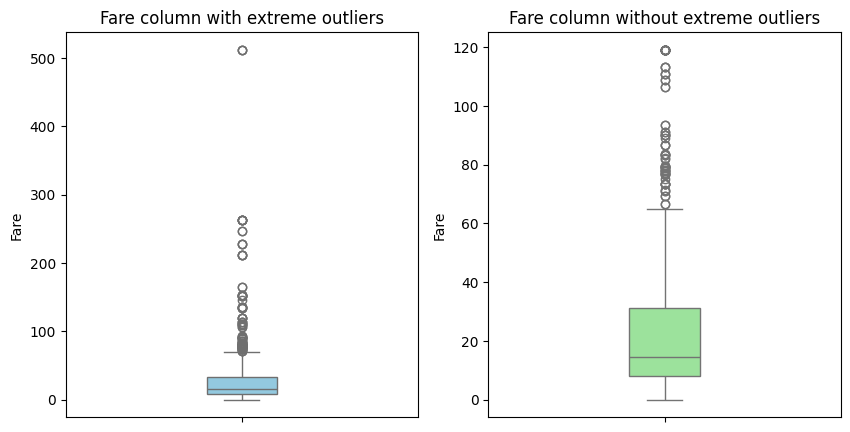

In [417]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'Fare', width = .2, color = 'skyblue')
axes[0].set_title('Fare column with extreme outliers')

sns.boxplot(ax = axes[1], data = titanic_fare_cleaned, y = 'Fare', width = .2, color = 'lightgreen')
axes[1].set_title('Fare column without extreme outliers')

plt.show()

#### __Finally, let's compare the original boxplot from the [Part #2](https://github.com/cult2rologist/Titanic-Dataset/blob/main/Titanic_Part2.ipynb) with the cleaned one side by side__

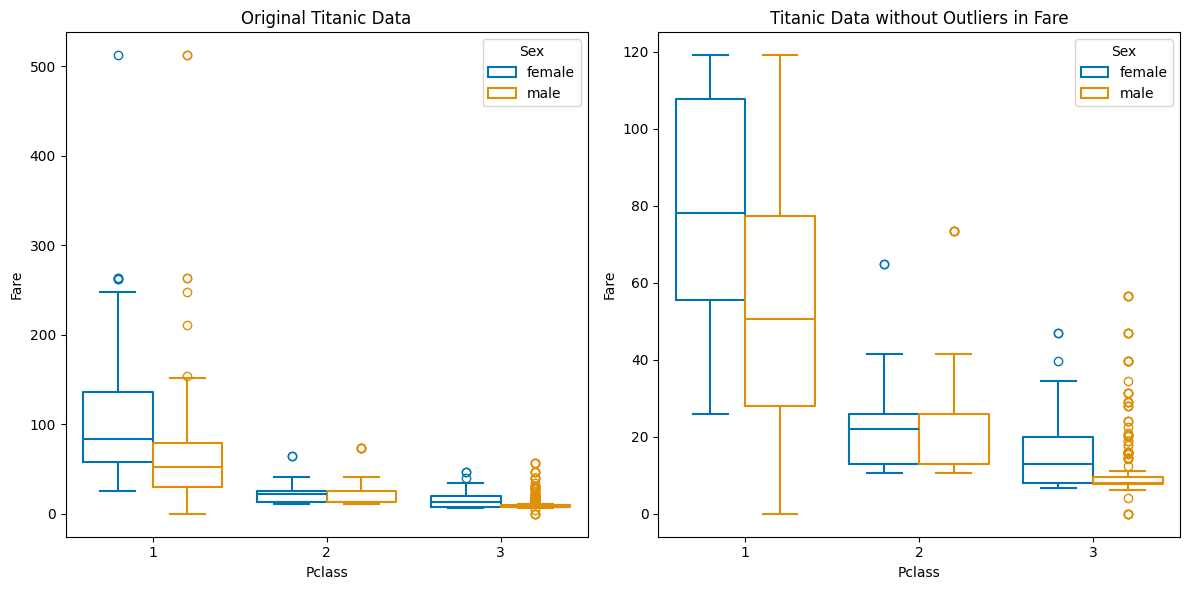

In [418]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=axes[0], data=titanic, x='Pclass', y='Fare', hue='Sex', palette='colorblind', fill=False, width=0.8, dodge=True)
axes[0].set_title('Original Titanic Data')

sns.boxplot(ax=axes[1], data=titanic_fare_cleaned, x='Pclass', y='Fare', hue='Sex', palette='colorblind', fill=False, width=0.8, dodge=True)
axes[1].set_title('Titanic Data without Outliers in Fare')

plt.tight_layout()

plt.show()